In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
file_path="training_set_features.csv"
df=pd.read_csv(file_path)

In [3]:
df.sample(5)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
7874,7874,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Principle City",2.0,0.0,fcxhlnwr,cmhcxjea
11959,11959,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,bhuqouqj,"MSA, Principle City",2.0,0.0,wxleyezf,emcorrxb
6364,6364,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,wxleyezf,emcorrxb
21979,21979,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,lzgpxyit,"MSA, Not Principle City",1.0,2.0,NaN,NaN
17479,17479,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,atmpeygn,"MSA, Principle City",2.0,0.0,NaN,NaN


In [4]:
df.shape

(26707, 36)

<Axes: >

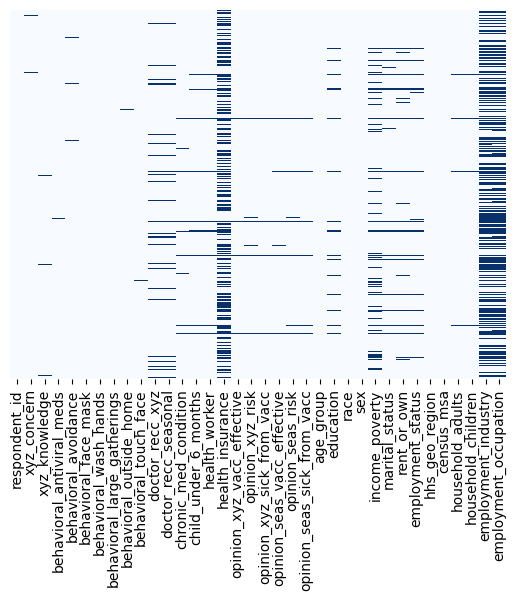

In [5]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns)

In [6]:
#df_combined.drop(columns=['employment_industry' , 'employment_occupation' ] , inplace =True)
df.drop(columns=['employment_industry', 'employment_occupation','health_insurance','respondent_id'], inplace=True)

In [7]:

# Define the replacement mappings for education and income_poverty columns
replacement_map = {
    'education': {
        '< 12 Years': 1.0,
        '12 Years': 2.0,
        'Some College': 3.0,
        'College Graduate': 4.0
    },
    'income_poverty': {
        'Below Poverty': 1.0,
        '<= $75,000, Above Poverty': 2.0,
        '> $75,000': 3.0
    },
    'marital_status': {
        'Not Married': 0.0,
        'Married': 1.0
    },
    'employment_status': {
        'Not in Labor Force': 1.0,
        'Employed': 2.0,
        'Unemployed': 3.0
    },'age_group': {
        '18 - 34 Years': 1.0,
        '35 - 44 Years': 2.0,
        '45 - 54 Years': 3.0,
        '55 - 64 Years': 4.0,
        '65+ Years': 5.0
    }
}

# Apply replacement mapping to each specified column
for column, mapping in replacement_map.items():
    if column in df.columns:
        # Replace using the mapping
        df[column] = df[column].replace(mapping)

# Display the modified DataFrame
df.head()


C:\Users\shaur\AppData\Local\Temp\ipykernel_16880\1807771830.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping)


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,1.0,0.0,Own,1.0,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,1.0,0.0,Rent,2.0,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,2.0,0.0,Own,2.0,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,1.0,0.0,Rent,1.0,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,2.0,1.0,Own,2.0,qufhixun,"MSA, Not Principle City",1.0,0.0


In [8]:
df.head()
df['rent_or_own'].unique()

array(['Own', 'Rent', nan], dtype=object)

In [9]:
for column in df.columns:
    missing_count = df[column].isnull().sum()
    print(f"Number of missing values in '{column}': {missing_count}")


Number of missing values in 'xyz_concern': 92
Number of missing values in 'xyz_knowledge': 116
Number of missing values in 'behavioral_antiviral_meds': 71
Number of missing values in 'behavioral_avoidance': 208
Number of missing values in 'behavioral_face_mask': 19
Number of missing values in 'behavioral_wash_hands': 42
Number of missing values in 'behavioral_large_gatherings': 87
Number of missing values in 'behavioral_outside_home': 82
Number of missing values in 'behavioral_touch_face': 128
Number of missing values in 'doctor_recc_xyz': 2160
Number of missing values in 'doctor_recc_seasonal': 2160
Number of missing values in 'chronic_med_condition': 971
Number of missing values in 'child_under_6_months': 820
Number of missing values in 'health_worker': 804
Number of missing values in 'opinion_xyz_vacc_effective': 391
Number of missing values in 'opinion_xyz_risk': 388
Number of missing values in 'opinion_xyz_sick_from_vacc': 395
Number of missing values in 'opinion_seas_vacc_effecti

<Axes: xlabel='rent_or_own', ylabel='count'>

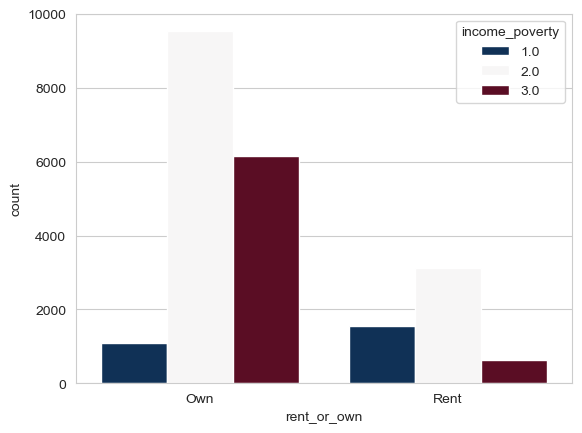

In [10]:
sns.set_style('whitegrid') 
sns.countplot(x='rent_or_own', hue='income_poverty', data=df, palette='RdBu_r')

In [11]:
# Condition to determine missing values in rent_or_own based on income_poverty
mask_missing_rent = df['rent_or_own'].isnull() & df['income_poverty'].notnull()

# Assign values based on income_poverty
df.loc[mask_missing_rent, 'rent_or_own'] = df.loc[mask_missing_rent, 'income_poverty'].apply(lambda x: 'Own' if x >= 2 else 'Rent')

In [12]:
col_iterative_imp=['doctor_recc_xyz','income_poverty','doctor_recc_seasonal','marital_status','employment_status','education']
# Create an IterativeImputer instance
imputer = IterativeImputer()

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(df[col_iterative_imp])

# Replace the original columns with imputed values
df[col_iterative_imp] = imputed_data

<Axes: >

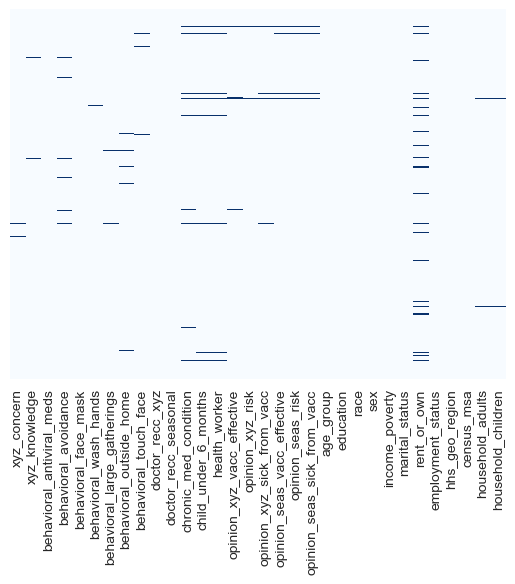

In [13]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns)

In [14]:
col_knni_imp=['behavioral_avoidance','child_under_6_months','health_worker','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','household_adults','household_children']
# Create a KNNImputer instance with appropriate parameters
imputer = KNNImputer(n_neighbors=10)  # You can adjust n_neighbors as needed

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(df[col_knni_imp])

# Replace the original columns with imputed values
df[col_knni_imp] = imputed_data

In [15]:
from sklearn.impute import SimpleImputer

col_simple_imp = df.columns
imputer = SimpleImputer(strategy='most_frequent')

# Using double square brackets to access multiple columns
df[col_simple_imp] = imputer.fit_transform(df[col_simple_imp])

In [16]:
'''from sklearn.impute import SimpleImputer

numerical_columns = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')

# Using double square brackets to access multiple columns
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
'''

"from sklearn.impute import SimpleImputer\n\nnumerical_columns = df.select_dtypes(include=['number']).columns\nimputer = SimpleImputer(strategy='mean')\n\n# Using double square brackets to access multiple columns\ndf[numerical_columns] = imputer.fit_transform(df[numerical_columns])\n"

In [17]:
'''categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)'''

"categorical_columns = df.select_dtypes(include=['object']).columns\nprint(categorical_columns)"

In [18]:
'''from sklearn.impute import SimpleImputer

categorical_columns = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')

# Using double square brackets to access multiple columns
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
#df_combined[['employment_status']] = imputer.fit_transform(df_combined[['employment_status']])
'''

"from sklearn.impute import SimpleImputer\n\ncategorical_columns = df.select_dtypes(include=['object']).columns\nimputer = SimpleImputer(strategy='most_frequent')\n\n# Using double square brackets to access multiple columns\ndf[categorical_columns] = imputer.fit_transform(df[categorical_columns])\n#df_combined[['employment_status']] = imputer.fit_transform(df_combined[['employment_status']])\n"

<Axes: >

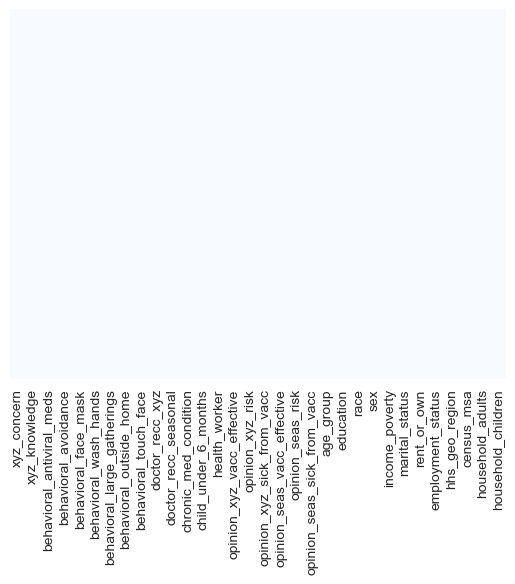

In [19]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns)

In [20]:
file_path1="training_set_labels.csv"
df1=pd.read_csv(file_path1)
df1.head()
df_combined=pd.concat([df, df1], axis=1)
df_combined.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,respondent_id,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,Own,1.0,oxchjgsf,Non-MSA,0.0,0.0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,Rent,2.0,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.21204,...,0.0,Own,2.0,qufhixun,"MSA, Not Principle City",2.0,0.0,2,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,Rent,1.0,lrircsnp,"MSA, Principle City",0.0,0.0,3,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,Own,2.0,qufhixun,"MSA, Not Principle City",1.0,0.0,4,0,0


In [21]:
'''# Example plotting for multiple features
features = ['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children']  # List of features to plot

num_features = len(features)
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(12, 4*num_features))

# Iterate over each feature
for i, feature in enumerate(features):
    # Plot for target1
    sns.countplot(x=feature, data=df_combined, hue='xyz_vaccine', ax=axes[i, 0] , palette ='viridis')
    axes[i, 0].set_title(f'Count Plot for {feature} vs xyz_vaccine')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].legend(title='xyz_vaccine', loc='upper right')

    # Plot for target2
    sns.countplot(x=feature, data=df_combined, hue='seasonal_vaccine', ax=axes[i, 1], palette='Set2')
    axes[i, 1].set_title(f'Count Plot for {feature} vs seasonal_vaccine')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].legend(title='seasonal_vaccine', loc='upper right')

# Adjust layout
plt.tight_layout()
'''

"# Example plotting for multiple features\nfeatures = ['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',\n       'behavioral_avoidance', 'behavioral_face_mask',\n       'behavioral_wash_hands', 'behavioral_large_gatherings',\n       'behavioral_outside_home', 'behavioral_touch_face',\n       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',\n       'child_under_6_months', 'health_worker', 'health_insurance',\n       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',\n       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',\n       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',\n       'education', 'race', 'sex', 'income_poverty', 'marital_status',\n       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',\n       'household_adults', 'household_children']  # List of features to plot\n\nnum_features = len(features)\nfig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(12, 4*num_features))\n\n# Iterate ove

In [22]:
df_combined.duplicated().sum()


0

In [23]:
df_combined.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

<Axes: >

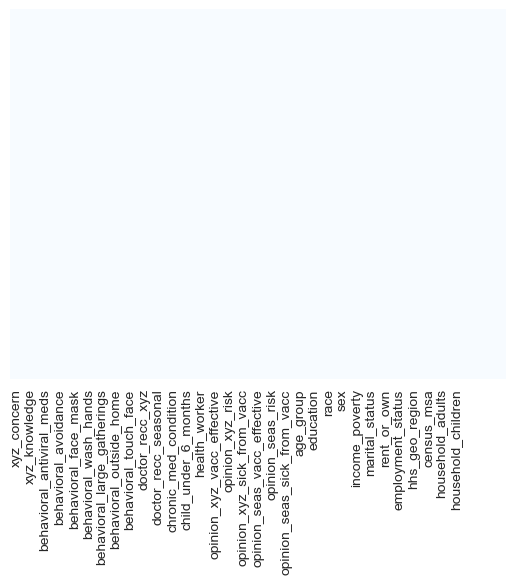

In [24]:
sns.heatmap(df_combined.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns)

In [25]:
categorical_columns = df_combined.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [26]:
pd.set_option('display.max_columns', None)
df_combined.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,respondent_id,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,White,Female,1.0,0.0,Own,1.0,oxchjgsf,Non-MSA,0.0,0.0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,White,Male,1.0,0.0,Rent,2.0,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.21204,0.285977,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,White,Male,2.0,0.0,Own,2.0,qufhixun,"MSA, Not Principle City",2.0,0.0,2,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,White,Female,1.0,0.0,Rent,1.0,lrircsnp,"MSA, Principle City",0.0,0.0,3,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,White,Female,2.0,1.0,Own,2.0,qufhixun,"MSA, Not Principle City",1.0,0.0,4,0,0


In [27]:
# Specify columns to be one-hot encoded
columns_to_encode = ['race', 'sex', 'rent_or_own', 'hhs_geo_region', 'census_msa']

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df_combined[columns_to_encode], drop_first=True)

# Drop the original categorical columns from the DataFrame
df_combined = df_combined.drop(columns=columns_to_encode)

# Combine the original DataFrame (without categorical columns) with the encoded columns
df_final = pd.concat([df_combined, df_encoded], axis=1)

df_final.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,employment_status,household_adults,household_children,respondent_id,xyz_vaccine,seasonal_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male,rent_or_own_Rent,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1,0,1,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.21204,0.285977,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,0.0,2.0,2.0,0.0,2,0,0,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,3,0,1,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,1.0,2.0,1.0,0.0,4,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [28]:
df_combined.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,employment_status,household_adults,household_children,respondent_id,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.21204,0.285977,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,0.0,2.0,2.0,0.0,2,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,3,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,1.0,2.0,1.0,0.0,4,0,0


In [29]:
x_train = df_final.drop(columns=['xyz_vaccine' , 'seasonal_vaccine','respondent_id'])
x_train_1 = df_final.drop(columns=['xyz_vaccine' , 'seasonal_vaccine','respondent_id'])

In [30]:
y_train_xyz = df_final['xyz_vaccine'].astype(int)
y_train_seas = df_final['seasonal_vaccine'].astype(int)

In [31]:
from imblearn.over_sampling import SMOTE
#df = pd.get_dummies(df, drop_first=True)

x_train,y_train_xyz=SMOTE().fit_resample(x_train,y_train_xyz)
y_train_xyz.value_counts() 

xyz_vaccine
0    21033
1    21033
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

x_train_ , x_test_ , y_train_xyz_ , y_test_xyz_ = train_test_split(x_train , y_train_xyz , test_size=0.4)

In [33]:
df_combined.shape


(26707, 30)

In [34]:
categorical_columns = df_combined.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'marital_status', 'employment_status',
       'household_adults', 'household_children'],
      dtype='object')


In [35]:
x_train_.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,employment_status,household_adults,household_children,race_Hispanic,race_Other or Multiple,race_White,sex_Male,rent_or_own_Rent,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
36109,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,5.0,4.47446,1.0,4.52554,3.0,2.0,1.0,1.47446,1.0,0.0,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True
23490,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,2.0,2.03297,1.0,1.0,2.0,0.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
40166,3.0,2.0,0.0,1.0,0.0,0.306672,0.306672,0.306672,0.306672,1.0,1.0,0.0,0.0,0.0,5.0,1.306672,1.0,5.0,1.0,1.0,5.0,2.306672,2.0,0.0,1.0,0.0,0.0,True,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False
31754,2.0,1.196194,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.196194,2.0,4.0,4.0,2.0,1.0,4.803806,4.0,2.196194,1.0,2.196194,1.0,0.0,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True
24425,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,3.0,1.0,2.0,1.0,0.0,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True


In [36]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train_ = sc.fit_transform(x_train_)
x_test_ = sc.transform(x_test_)

In [37]:
from xgboost import XGBClassifier

model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)

model.fit(x_train_, y_train_xyz_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

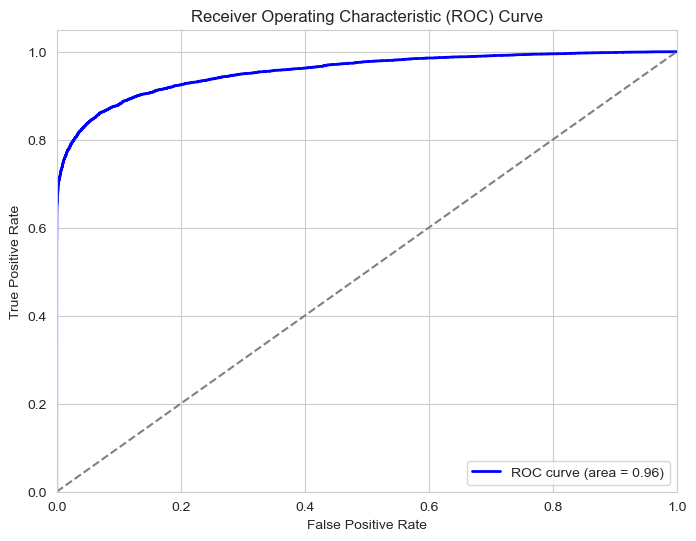

ROC AUC Score: 0.96


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_pred_proba_xyz = model.predict_proba(x_test_)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_xyz_, y_pred_proba_xyz)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test_xyz_, y_pred_proba_xyz)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f'ROC AUC Score: {roc_auc:.2f}')

In [39]:
from sklearn.model_selection import train_test_split

x_train_ , x_test_ , y_train_seas_ , y_test_seas_ = train_test_split(x_train_1 , y_train_seas , test_size=0.4 , random_state=47)

In [40]:
sc=StandardScaler()
sc=StandardScaler()
x_train_ = sc.fit_transform(x_train_)
x_test_ = sc.transform(x_test_)

In [41]:
from xgboost import XGBClassifier

b_model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)

b_model.fit(x_train_, y_train_seas_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

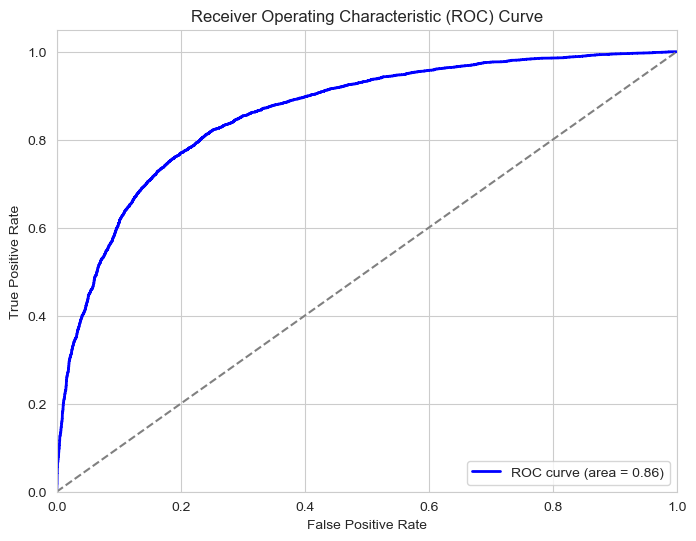

ROC AUC Score: 0.86


In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_pred_proba_seas = b_model.predict_proba(x_test_)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_seas_, y_pred_proba_seas)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test_seas_, y_pred_proba_seas)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f'ROC AUC Score: {roc_auc:.2f}')

In [43]:
y_train_xyz.tail()

42061    1
42062    1
42063    1
42064    1
42065    1
Name: xyz_vaccine, dtype: int32

In [44]:
x_train.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,employment_status,household_adults,household_children,race_Hispanic,race_Other or Multiple,race_White,sex_Male,rent_or_own_Rent,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.21204,0.285977,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,0.0,2.0,2.0,0.0,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,1.0,2.0,1.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [45]:
for column_name in x_train.columns:
    unique_values = x_train[column_name].unique()
    print(f"Column '{column_name}' unique values:")
    print(unique_values)
    print()

Column 'xyz_concern' unique values:
[1.0 3.0 2.0 ... 2.08432254316358 0.0813533189933533 1.5510030383109616]

Column 'xyz_knowledge' unique values:
[0.0 2.0 1.0 ... 1.2239722015305747 1.9186466810066467 1.252449326228767]

Column 'behavioral_antiviral_meds' unique values:
[0.0 1.0 0.694320962554827 ... 0.9553918419551026 0.4331120156992365
 0.9186466810066467]

Column 'behavioral_avoidance' unique values:
[0.0 1.0 0.5 ... 0.6902986081199102 0.29841895650866523 0.7760277984694253]

Column 'behavioral_face_mask' unique values:
[0.0 1.0 0.06818243875414398 ... 0.3097013918800898 0.91567745683642
 0.3270197497193451]

Column 'behavioral_wash_hands' unique values:
[0.0 1.0 0.2868241874560298 ... 0.6902986081199102 0.2829039237867068
 0.08432254316358001]

Column 'behavioral_large_gatherings' unique values:
[0.0 1.0 0.9121367575408609 ... 0.9259336094374893 0.42555959399999854
 0.7944308841034604]

Column 'behavioral_outside_home' unique values:
[1.0 0.0 0.9121367575408609 ... 0.327019749719

In [46]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train = sc.fit_transform(x_train)

In [47]:
from xgboost import XGBClassifier

xyz_model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)

xyz_model.fit(x_train, y_train_xyz)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train_1 = sc.fit_transform(x_train_1)

In [49]:
from xgboost import XGBClassifier

sea_model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)

sea_model.fit(x_train_1, y_train_seas)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
data_test = pd.read_csv("test_set_features.csv")
data_test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [51]:
df = data_test

#df_combined.drop(columns=['employment_industry' , 'employment_occupation' ] , inplace =True)
df.drop(columns=['employment_industry', 'employment_occupation','health_insurance','respondent_id'], inplace=True)

# Define the replacement mappings for education and income_poverty columns
replacement_map = {
    'education': {
        '< 12 Years': 1.0,
        '12 Years': 2.0,
        'Some College': 3.0,
        'College Graduate': 4.0
    },
    'income_poverty': {
        'Below Poverty': 1.0,
        '<= $75,000, Above Poverty': 2.0,
        '> $75,000': 3.0
    },
    'marital_status': {
        'Not Married': 0.0,
        'Married': 1.0
    },
    'employment_status': {
        'Not in Labor Force': 1.0,
        'Employed': 2.0,
        'Unemployed': 3.0
    },'age_group': {
        '18 - 34 Years': 1.0,
        '35 - 44 Years': 2.0,
        '45 - 54 Years': 3.0,
        '55 - 64 Years': 4.0,
        '65+ Years': 5.0
    }
}

# Apply replacement mapping to each specified column
for column, mapping in replacement_map.items():
    if column in df.columns:
        # Replace using the mapping
        df[column] = df[column].replace(mapping)

# Condition to determine missing values in rent_or_own based on income_poverty
mask_missing_rent = df['rent_or_own'].isnull() & df['income_poverty'].notnull()

# Assign values based on income_poverty
df.loc[mask_missing_rent, 'rent_or_own'] = df.loc[mask_missing_rent, 'income_poverty'].apply(lambda x: 'Own' if x >= 2 else 'Rent')

col_iterative_imp=['doctor_recc_xyz','income_poverty','doctor_recc_seasonal','marital_status','employment_status','education']
# Create an IterativeImputer instance
imputer = IterativeImputer()

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(df[col_iterative_imp])

# Replace the original columns with imputed values
df[col_iterative_imp] = imputed_data

col_knni_imp=['behavioral_avoidance','child_under_6_months','health_worker','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','household_adults','household_children']
# Create a KNNImputer instance with appropriate parameters
imputer = KNNImputer(n_neighbors=10)  # You can adjust n_neighbors as needed

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(df[col_knni_imp])

# Replace the original columns with imputed values
df[col_knni_imp] = imputed_data

from sklearn.impute import SimpleImputer

col_simple_imp = df.columns
imputer = SimpleImputer(strategy='most_frequent')

# Using double square brackets to access multiple columns
df[col_simple_imp] = imputer.fit_transform(df[col_simple_imp])

# Specify columns to be one-hot encoded
columns_to_encode = ['race', 'sex', 'rent_or_own', 'hhs_geo_region', 'census_msa']

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df[columns_to_encode], drop_first=True)

# Drop the original categorical columns from the DataFrame
df = df.drop(columns=columns_to_encode)

# Combine the original DataFrame (without categorical columns) with the encoded columns
df_final = pd.concat([df, df_encoded], axis=1)

df_final.head()

C:\Users\shaur\AppData\Local\Temp\ipykernel_16880\3518865241.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping)


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,employment_status,household_adults,household_children,race_Hispanic,race_Other or Multiple,race_White,sex_Male,rent_or_own_Rent,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0,2.0,4.0,3.0,0.0,2.0,1.0,0.0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,3.0,0.0,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,3.0,1.0,2.0,1.0,0.0,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


In [52]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_final = sc.fit_transform(df_final)

In [53]:
y_pred_proba_xyz = xyz_model.predict_proba(df_final)[:, 1]

In [54]:
y_pred_proba_sea = sea_model.predict_proba(df_final)[:, 1]

In [55]:
data_test = pd.read_csv("test_set_features.csv")
data_test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [56]:
# Check if the length of the arrays matches the number of rows in data_test
if len(y_pred_proba_xyz) != len(data_test) or len(y_pred_proba_sea) != len(data_test):
    raise ValueError("The length of the prediction arrays must match the number of rows in data_test")

# Extract the respondent_id column
respondent_id = data_test['respondent_id']

# Create a new DataFrame with respondent_id and the predictions
final_data = pd.DataFrame({
    'respondent_id': respondent_id,
    'xyz_vaccine': y_pred_proba_xyz,
    'seasonal_vaccine': y_pred_proba_sea
})

# Print the new DataFrame
final_data.head()


,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.998004,0.117890
1,26708,0.999928,0.045144
2,26709,0.998899,0.709136
3,26710,0.999367,0.483833
4,26711,0.999011,0.319061
